# Preparing the environment

## Graphics and plotting

The following block of code initializes the Python plotting library [matplotlib](http://matplotlib.org/gallery.html) and configures it to show figures embedded in the notebook (as opposed to opening a new window for each figure):

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

The Seaborn library provides easy-to-use plotting functions for common plot types, and better default visual styles.

In [3]:
import seaborn as sea

Set the default size and style of the plot.  (Plots are styled to [look like R's `ggplot`](http://tonysyu.github.io/mpltools/auto_examples/style/plot_ggplot.html) library.)

In [4]:
matplotlib.rcParams['figure.figsize'] = (10, 7)

sea.set_style('dark')

Also make the NumPy library available (without it, some features of Matplotlib and -especially- Seaborn) will *not* work:

In [5]:
import numpy as np

## SQL database connection

The ESC403 cluster comes preinstalled with [Catherine Devlin's `%sql`-magic for IPython][1]; this allows you to run SQL queries from the IPython notebook, and intermix them with Python code.

[1]: https://github.com/catherinedevlin/ipython-sql

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code

In [6]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement (the `rmurri@/equidistantpoints` syntax means "connect to the PostGreSQL DB named `equidistantpoints` running on *this* host as user `rmurri`" -- of course change `rmurri` to *your* user name):

In [7]:
%sql postgresql://mivkov@/equidistantpoints

u'Connected: mivkov@equidistantpoints'

This database contains the [Equidistant Geographic Grid Points and Modern Climate](http://mypage.iu.edu/~pdpolly/Data.html) dataset (this the "extended North American data" in the words of the source website), see the [original publication](http://mypage.iu.edu/~pdpolly/Data.html) for details.

We are going to use only the "temperature" table in the following. (But feel free to experiment with the others!)

In [8]:
%sql select * from natempwilmott limit 3;

3 rows affected.


id,longitude,latitude,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,ann
6,-79.46900,82.81348,-35.00000,-37.00000,-33.00000,-24.90000,-10.00000,0.30000,3.30000,1.40000,-9.00000,-20.70000,-28.80000,-32.50000,-18.90000
7,-75.87860,82.81348,-35.00000,-37.10000,-32.80000,-24.70000,-9.90000,0.10000,3.30000,1.40000,-9.20000,-20.90000,-28.80000,-32.30000,-18.80000
8,-72.28820,82.81348,-34.90000,-36.90000,-32.70000,-24.60000,-9.90000,-0.10000,3.20000,1.30000,-9.50000,-20.90000,-28.80000,-32.00000,-18.80000


----

# Interactive plotting

Jupyter/IPython provides facilities for making interactive visualizations in the notebook.

The general schema for making an interactive visualization is:

1. Make a function that takes the interactively-settable parameters as arguments, and returns a "plot" (or any other object that can be shown in the notebook).
2. Decorate this function with the `@interact` annotation, providing initial values for all interactively-settable parameters.

All relevant code lives in Python module `ipywidgets`:

In [9]:
from ipywidgets import interact, FloatSlider, Select, Dropdown

The following example shows how to create an interactive sine wave plot (see [here](http://earthpy.org/pyncview_pm.html)).  Note how IPython automatically detects the parameter type and uses a slider to set floating-point values and a text-box for the `color` parameter:

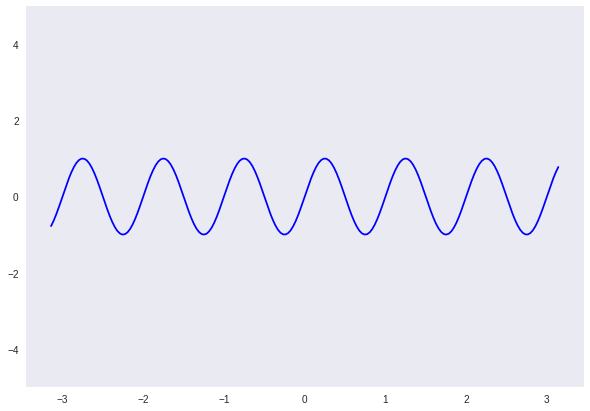

In [10]:
@interact(freq=1.0, amp=1.0, color='blue')
def wave(freq, amp, color):
    xs = np.linspace(-np.pi, +np.pi, 200)
    ys = np.sin(2*np.pi*freq*xs) * amp
    ax = plt.gca()
    ax.plot(xs, ys, color=color)
    ax.set_ylim([-5., +5.])
    return ax

However, with auto-detection we cannot constrain the input values: e.g., we cannot set the valid range of inputs, nor restrict the color selection.  It is possible to explicitly instanciate the widget to use for setting a parameter from a [large Widget list](http://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html).

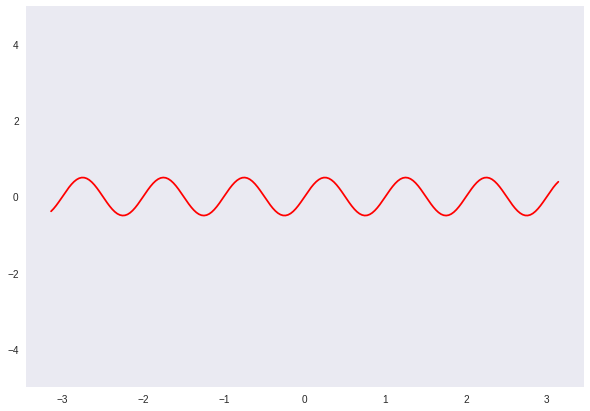

In [11]:
@interact(freq=1.0, 
          amp=FloatSlider(min=0.5, max=5.0, step=0.1), 
          color=Select(options=['red', 'green', 'blue'], description='color'))
def wave(freq, amp, color):
    xs = np.linspace(-np.pi, +np.pi, 200)
    ys = np.sin(2*np.pi*freq*xs) * amp
    ax = plt.gca()
    ax.plot(xs, ys, color=color)
    ax.set_ylim([-5., +5.])
    return ax

Using slider widgets often results in screen flickering (redrawing the plot is slower than just moving a slide).  The `continuous_update=False` argument can be added to the slider to only re-paint upon mouse button release.

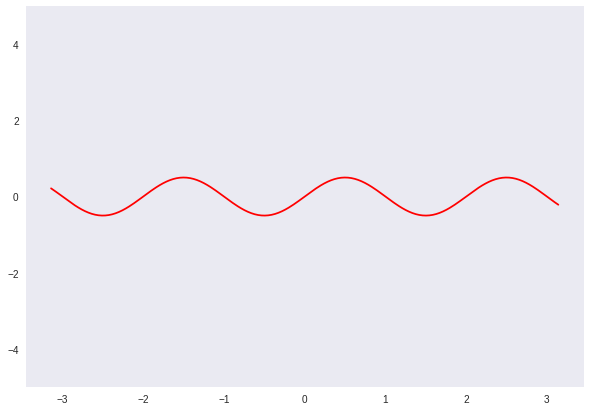

In [12]:
@interact(freq=FloatSlider(min=0.5, max=5.0, step=0.1, continuous_update=False), 
          amp=FloatSlider(min=0.5, max=5.0, step=0.1, continuous_update=False), 
          color=Select(options=['red', 'green', 'blue'], description='color'))
def wave(freq, amp, color):
    xs = np.linspace(-np.pi, +np.pi, 300)
    ys = np.sin(2*np.pi*freq*xs) * amp
    ax = plt.gca()
    ax.plot(xs, ys, color=color)
    ax.set_ylim([-5., +5.])
    return ax

----

## 1. Make an interactive plot of the earth surface: viewport is selected using sliders

In [13]:
import cartopy
import cartopy.crs
import cmocean

In [14]:
def earthplot(lon,lat):
    ax = plt.axes(projection=cartopy.crs.Orthographic(central_longitude=lon, central_latitude=lat))
    ax.coastlines()
    ax.gridlines()

/opt/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


<function __main__.earthplot>

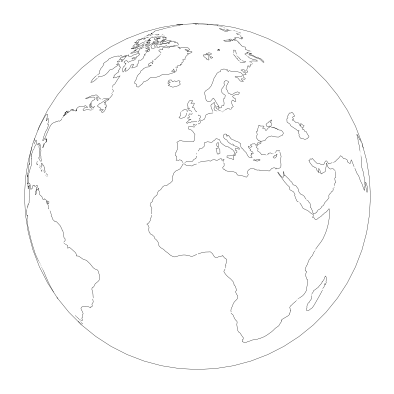

In [15]:
interact(earthplot,
         lon=FloatSlider(value=0,   min=-180.0, max=180.0, step=1.0, continuous_update=False),
         lat=FloatSlider(value=25,  min=-180.0, max=180.0, step=1.0, continuous_update=False)
        )

## 2. Make an interactive plot of average temperatures in NA: month should be selectable

In [16]:
%sql select * from natempwilmott limit 1;

1 rows affected.


id,longitude,latitude,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,ann
6,-79.46900,82.81348,-35.00000,-37.00000,-33.00000,-24.90000,-10.00000,0.30000,3.30000,1.40000,-9.00000,-20.70000,-28.80000,-32.50000,-18.90000


In [17]:
data = %sql select * from natempwilmott;

8509 rows affected.


In [55]:
# 1) Extract data

longitude = set(row[1] for row in data)               # extract data
longitude = sorted(longitude)                        # put data in a list; so far, it's only a generator
longitude = np.array(longitude,dtype=np.float)     # make a numpy array out of it, convert decimals to floats
longitude = np.sort(longitude)                     # sort the data

latitude = set(row[2] for row in data)                # extract data
latitude = sorted(latitude)                          # put data in a list; so far, it's only a generator
latitude = np.array(latitude,dtype=np.float)       # make a numpy array out of it, convert decimals to floats
latitude = np.sort(latitude)                       # sort the data


In [56]:
# 2) get array dimensions
nlon=len(longitude)
nlat=len(latitude)
ndata=13


#create empty 3d array and mask
temp3d_data = np.empty([ndata, nlon, nlat], dtype=np.float)
temp3d_mask = np.full(temp3d_data.shape, True,  dtype=np.bool)


#first create a dictionnary to quickly get the values in:
#for every value of longitude/latitude, assign an index
lon_to_index = { value:idx for idx, value in enumerate(longitude) }
lat_to_index = { value:idx for idx, value in enumerate(latitude) }


#populate the 3d array:
for row in data:                                  # for every row
    x = float(row[1])                             # get latitude/longitude
    y = float(row[2])
    i = lon_to_index[x]                           # get the index where the correct latitude/longitude is
    j = lat_to_index[y]
    for n, value in enumerate(row[3:]):
        temp3d_data[n, i, j] = float(value)       # write value into array
        temp3d_mask[n, i, j] = False              # set mask

        
# complete the 3d masked array
temp3d = np.ma.array(temp3d_data, mask=temp3d_mask)

In [57]:
# Plot everything

def plot_north_america():
    ax = plt.subplot(111, projection=cartopy.crs.PlateCarree())
    ax.set_extent((-180, -40, 10, 80), crs=cartopy.crs.PlateCarree())
    ax.gridlines(color='lightgrey', linestyle='-')
    ax.coastlines()
    return ax


def temperature_plot(month):
    ax = plot_north_america()
    temp2d = temp3d[month, :, :]
    ax.pcolormesh(longitude,latitude,temp2d.T, transform=cartopy.crs.PlateCarree(), cmap=cmocean.cm.thermal)
    return ax

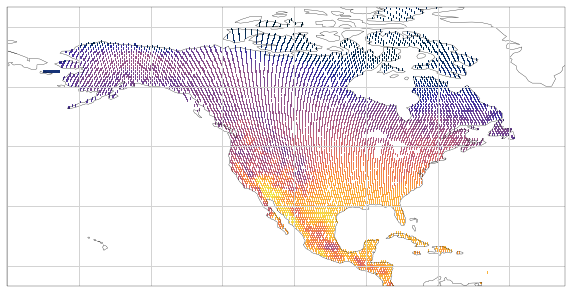

In [59]:
interact(temperature_plot,month={ 'january':0 , 'february':1, 'march':2, 'april':3,'may':4,'june':5,'july':6,'august':7, 'september':8,'october':9,'november':10,'december':11,'yearly':12  })